## The scraping process
To properly parse websites for data, you will need to perform a few steps:

1.  Identify the website where the data is located.
2. Verify that scraping the data does not violate the site's policies.
3. Manually examine the website with Chrome Developer Tools.
  - Learn the HTML structure of the site.
  - Learn how the data is requested by the site; that is, learn how the URL of the website is structured to get the data.
4. Use the requests library to fetch the HTML code of the  website
5. Use Beautiful Soup to parse the HTML and extract the content.
6. Follow links to get more data.
7. Store the data in a file for future analysis.

In this lesson, you will look at two examples. First, you will scrape [a list of jokes from Ducksters](https://www.ducksters.com/jokes/knockknock.php). (**Note:** The video below shows an example using [jokes from Pun.me](http://pun.me/pages/funny-jokes.php), but it's recommended that you use [jokes from Ducksters](https://www.ducksters.com/jokes/knockknock.php) instead in order to avoid recently reported certificate errors.) Then you will scrape [a list of questions from Stack Overflow](https://stackoverflow.com/questions).

## Jokes

For the first example, fetch the HTML code for the web page found at `https://www.ducksters.com/jokes/knockknock.php`. There is a list of jokes on this page. Open the URL in your Chrome browser, then open the Chrome Developer Tools. To open the Developer Tools, click the **Customize and control Google Chrome** menu ፧ icon in the corner of your Chrome window, then click **More tools > Developer tools**.

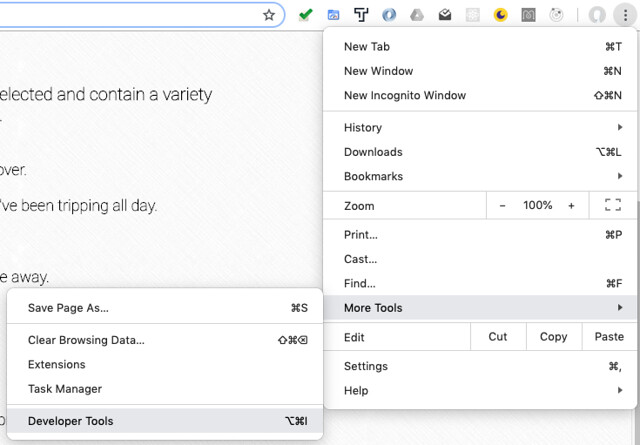

In the Developer Tools window, select the **Elements** tab. In this tab, the HTML code for the page is displayed. As you move your pointer over the code, the relevant parts of the page are highlighted. See if you can find the HTML code associated with the jokes themselves.

![HTML Code](https://farm8.staticflickr.com/7881/32380910067_f7eb8b9927_o.png)


There is a lot going on in the HTML code. But as you drill down into the code, you will find the section of code that starts like this:

```
    <div style="float:left;width:100%;">
        <div class="content">
            <p>
                Our most-liked jokes which are genuinely funny - this list of jokes has been hand selected and contain a variety of clever, clean and silly jokes so be prepared to laugh.
            </p>
            <ol>
             <li>Today at the bank, an old lady asked me to help check her balance. So I pushed her over.</li>
            <li>I bought some shoes from a drug dealer. I don't know what he laced them with, but I've been tripping all day.</li>
    ...
```


When you move your pointer over that section of code, the list of jokes itself will be highlighted. To be able to parse the HTML code to extract the data, you will need to understand a little about the structure of HTML. If you are already familiar with HTML, then you are all set—but if you are new to the language, then there are a few things to be aware of.

HTML is made up of *elements*. An element is constructed from *tags*. A tag looks like this: `<tagname>`. In the HTML code above, you can see that there are `<div>` tags, `<p>` tags, an `<ol>` tag, and some `<li>` tags. Each tag has a corresponding *close tag*, which looks just like the tag but with a slash `/`. So the `<li>` tag has a corresponding close `</li>` tag.

A `<li>` element is made up of the open and close `<li>` tags with some content between them, like this:

```
    <li>Today at the bank, an old lady asked me to help check her balance. So I pushed her over.</li>
```

The element tells the browser what to display and sometimes includes some information about the content. For example, `<p>` is for a paragraph of text, `<ol>` is for *ordered lists* (that is, numbered lists), and `<li>` is a list item. Notice how the `<ol>` element contains several `<li>` elements. Notice also that each `<li>` element corresponds to a single numbered item in the list. And `<div>` elements (sometimes known simply as *divs*) mark a division or section of the page.

There are many other elements on the page, but they are for the headings and menus and navigation that you don't need right now. You can typically use the Chrome Developer Tools to drill down to the most relevant elements on the page.

This example is simple enough that the URL does not need any special attention.

### Fetch the code
The next step is to fetch the HTML code from the website using the Python requests library. This is the same library that you used to request data from an API earlier, except in this case, you are not fetching JSON data. Instead, you can use the `text` property to get the HTML code.

In [0]:
import requests
url = ' http://pun.me/pages/funny-jokes.php'
response = requests.get(url)

# Make sure that you got a valid response
if(response.ok):
  # Get the full data from the response
  data = response.text
  print(data)

## Beautiful Soup
Parsing the HTML code that makes up a web page can be quite difficult, especially because there is no guarantee that the code is formatted correctly or consistently with any standard. Web pages are notoriously broken. But your web browser does a heroic job of rendering web pages even when they are broken. So even if you visit a website and it looks fine, that does not mean that the code is actually fine. In addition, building a polite scraper as defined previously requires even more complexity in your code. There are several good libraries that can help you navigate through the HTML code. Here, use [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) to simplify the parsing.


To use Beautiful Soup, you'll do the following:
  - Import the library
  - Create an object with the response text 
 
 
Beautiful Soup supports several different HTML parsers. That is, there are different ways that a program may read and understand an HTML page. When creating the object out of the HTML, you need to tell Beautiful Soup which parser to use. Here, use the default parser so that you can avoid having to install additional dependencies.

In [0]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(data, 'html.parser')

The variable `soup` in this code now contains an object of type `BeautifulSoup`. This object represents the entire HTML document. You can use the `prettify()` method to see what it contains.

In [0]:
print(soup.prettify())

## Navigating the document
Now that you have the document parsed, you need to be able to target just the elements that you need in the document. The page contains many different elements, most of which you can ignore. Try to find the ones that you want. Go back to Chrome Developer Tools and find the list of jokes in the HTML. You may notice that each joke is in a `<li>` element, and together, all the `<li>` elements  are in an `<ol>` element. Now, try to access that `<ol>` element.

To get a list of a certain type of element, you can use the `find_all()` method. This is probably the most common method for navigating through a document looking for specific tags.

In [0]:
# Make a list of all `<ol>` elements.
# Note that Beautiful Soup uses the syntax 'ol'
# to search for HTML `<ol>` elements.
soup.find_all('ol')

That did the trick. When you are only expecting a single element, you can use the `find()` method instead. Now that you have the list, try to get only the `<li>` elements from the list.

In [0]:
# Get the list
list = soup.find('ol')
items = list.find_all('li')
print(items)

[<li>Today at the bank, an old lady asked me to help check her balance. So I pushed her over.</li>, <li>I bought some shoes from a drug dealer. I don't know what he laced them with, but I've been tripping all day.</li>, <li>I told my girlfriend she drew her eyebrows too high. She seemed surprised.</li>, <li>My dog used to chase people on a bike a lot. It got so bad, finally I had to take his bike away.</li>, <li>I'm so good at sleeping. I can do it with my eyes closed.</li>, <li>My boss told me to have a good day.. so I went home.</li>, <li>Why is Peter Pan always flying? He neverlands.</li>, <li>A woman walks into a library and asked if they had any books about paranoia. The librarian says "They're right behind you!"</li>, <li>The other day, my wife asked me to pass her lipstick but I accidentally passed her a glue stick. She still isn't talking to me.</li>, <li>Why do blind people hate skydiving? It scares the hell out of their dogs.</li>, <li>When you look really closely, all mirror

That produces a list of the `<li>` tags. Finally, extract the text from within those tags.

In [0]:
jokes = [joke.get_text() for joke in items]
print(jokes)

['Today at the bank, an old lady asked me to help check her balance. So I pushed her over.', "I bought some shoes from a drug dealer. I don't know what he laced them with, but I've been tripping all day.", 'I told my girlfriend she drew her eyebrows too high. She seemed surprised.', 'My dog used to chase people on a bike a lot. It got so bad, finally I had to take his bike away.', "I'm so good at sleeping. I can do it with my eyes closed.", 'My boss told me to have a good day.. so I went home.', 'Why is Peter Pan always flying? He neverlands.', 'A woman walks into a library and asked if they had any books about paranoia. The librarian says "They\'re right behind you!"', "The other day, my wife asked me to pass her lipstick but I accidentally passed her a glue stick. She still isn't talking to me.", 'Why do blind people hate skydiving? It scares the hell out of their dogs.', 'When you look really closely, all mirrors look like eyeballs.', 'My friend says to me: "What rhymes with orange"

That did the trick. One problem that you may face is if there are multiple `<ol>` elements on the page. In that case, you would want to be as specific as possible. In HTML, each element can be given a `class` attribute and an `id` attribute. More than one element may have the same class, but IDs are supposed to be unique.

A quick examination of the HTML shows that the `<ol>` element has neither a class nor an ID. But the `<div>` element that encloses it has the class `content`. You could select the `<div>` with class `content`, then select the `<ol>` from within. Remember that even though this step isn't necessary for this particular page, you want to make a robust scraper that will work even if the website owner adds more lists to the same page.

As a quick illustration of this, repeat exactly what was done above, but use a different approach to find the jokes.

In [0]:
# This gets a list of all `<div>` HTML elements on the page
# soup.find_all('div')

# Get just the `<div>` elements with class 'content'
div = soup.find('div', class_='content')
list = div.find('ol')
items = list.find_all('li')
jokes = [joke.get_text() for joke in items]
print(jokes)

['Today at the bank, an old lady asked me to help check her balance. So I pushed her over.', "I bought some shoes from a drug dealer. I don't know what he laced them with, but I've been tripping all day.", 'I told my girlfriend she drew her eyebrows too high. She seemed surprised.', 'My dog used to chase people on a bike a lot. It got so bad, finally I had to take his bike away.', "I'm so good at sleeping. I can do it with my eyes closed.", 'My boss told me to have a good day.. so I went home.', 'Why is Peter Pan always flying? He neverlands.', 'A woman walks into a library and asked if they had any books about paranoia. The librarian says "They\'re right behind you!"', "The other day, my wife asked me to pass her lipstick but I accidentally passed her a glue stick. She still isn't talking to me.", 'Why do blind people hate skydiving? It scares the hell out of their dogs.', 'When you look really closely, all mirrors look like eyeballs.', 'My friend says to me: "What rhymes with orange"

## Programming questions

Suppose that you were tasked with creating a presentation about current trends in programming questions being asked on Stack Overflow. For example, what technologies are developers asking the most questions about? Which technologies get the most attention? You can get some of that information from the Stack Overflow website.

[The Stack Overflow website](https://stackoverflow.com/questions) consists of questions and answers by software developers and other people in the software development community. On the page, there are several questions listed, along with ads and other information. But this site uses pagination to display a long list of questions one page at a time. To see the second page, you can click the **Next** button at the bottom of the list. To scrape useful information from this website, you will need to follow that link.

Now, use the Chrome Developer Tools and the Scrapy shell to examine the page a bit.

![Questions](https://live.staticflickr.com/65535/49505599618_2c40361f2f_c_d.jpg)

Drilling into the page structure, you will find that there is a `<div>` element with the ID `questions`. This `<div>` contains all the questions displayed on the page. Each question listing has an HTML structure similar to this:

```html

<div class="question-summary" id="question-summary-60128236">
    <div class="statscontainer">
        <div class="stats">
            <div class="vote">
                <div class="votes">
                    <span class="vote-count-post "><strong>0</strong></span>
                    <div class="viewcount">votes</div>
                </div>
            </div>
            <div class="status unanswered">
                <strong>0</strong>answers
            </div>
        </div>
        <div class="views " title="2 views">
    2 views
</div>
    </div>
    <div class="summary">
        <h3><a href="/questions/60128236/semantic-segmentation-accuracy-starting-close-to-zero" class="question-hyperlink">Semantic Segmentation accuracy starting close to zero</a></h3>
        <div class="excerpt">
            I'm trying to build a machine learning semantic classification algorithm for the CamVID dataset using a U-net approach in Keras. 

I've used the following tutorial and tried to apply it to the ...
        </div>
        <div class="tags t-machine-learning t-keras">
            <a href="/questions/tagged/machine-learning" class="post-tag" title="show questions tagged 'machine-learning'" rel="tag">machine-learning</a> <a href="/questions/tagged/keras" class="post-tag" title="show questions tagged 'keras'" rel="tag">keras</a> 
        </div>
        <div class="started fr">
            <div class="user-info ">
    <div class="user-action-time">
        asked <span title="2020-02-08 15:27:35Z" class="relativetime">13 mins ago</span>
    </div>
    <div class="user-gravatar32">
        <a href="/users/3429605/rutger-hofste"><div class="gravatar-wrapper-32"><img src="https://www.gravatar.com/avatar/4cab1e2f110ecff055651ca7a94940c1?s=32&amp;d=identicon&amp;r=PG&amp;f=1" alt="" width="32" height="32" class="bar-sm"></div></a>
    </div>
    <div class="user-details">
        <a href="/users/3429605/rutger-hofste">Rutger Hofste</a>
        <div class="-flair">
            <span class="reputation-score" title="reputation score " dir="ltr">2,071</span><span title="1 gold badge" aria-hidden="true"><span class="badge1"></span><span class="badgecount">1</span></span><span class="v-visible-sr">1 gold badge</span><span title="15 silver badges" aria-hidden="true"><span class="badge2"></span><span class="badgecount">15</span></span><span class="v-visible-sr">15 silver badges</span><span title="22 bronze badges" aria-hidden="true"><span class="badge3"></span><span class="badgecount">22</span></span><span class="v-visible-sr">22 bronze badges</span>
        </div>
    </div>
</div>
        </div>
    </div>
</div>
```

So there is still a lot of extraneous information in there. You may be interested in the question title, the excerpt, and the list of tags. Now, use Beautiful Soup to try to select the parts that you need.

In [0]:
url = 'https://stackoverflow.com/questions'
response = requests.get(url)

# Make sure that you got a valid response
if(response.ok):
  # Get the full data from the response
  data = response.text
  soup = BeautifulSoup(data, 'html.parser')
  
  # Find all elements with class 'question-summary'
  summary =soup.find_all(class_='question-summary')
  # print(summary)

Not bad—that did return a list of the `<div>` elements that contain the question information. But there is still a lot of extraneous HTML. You may not be interested in the number of votes, for example. You could narrow it down further by just getting the summaries. Notice that within each `question-summary`, there is another `<div>` with the class `summary`. That inner `<div>` contains all the information that you are interested in collecting.

In [0]:
summaries = soup.find_all(class_='summary')
print(summaries)

Much better! But the actual title text that you want is in an `<a>` tag inside an `<h3>` tag. You can continue navigating down the document, or you can use another technique: [CSS selectors](https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors). CSS is the language that's used to apply styles to web pages. CSS selectors are used to select specific elements on the page, so that styles may be applied to just those elements. But the syntax is so powerful that you can use the same selector syntax in Beautiful Soup. 

To select all elements with a particular class, use the `.classname` selector.

In [0]:
summaries = soup.select('.summary')
print(summaries)

This is the same output as from above. So now, extend this a bit. To select only the `<h3>` elements in the `<div>` elements with class `summary`, you can use the *child selector*. The `>` symbol is used to specify a child element, which is an element contained within another element.

In [0]:
title_headings = soup.select('.summary > h3')
print(title_headings)

[<h3><a class="question-hyperlink" href="/questions/60129328/why-does-file-delete-or-file-deleteonexit-not-delete-my-file">Why does file.delete() or file.deleteOnExit() not delete my file</a></h3>, <h3><a class="question-hyperlink" href="/questions/60129327/how-to-overwrite-data-in-the-database-asp-net">How to overwrite data in the database? asp.net</a></h3>, <h3><a class="question-hyperlink" href="/questions/60129326/django-unittest-how-to-disable-console-logging-only">Django unittest - How to disable console logging only</a></h3>, <h3><a class="question-hyperlink" href="/questions/60129324/colorpicker-does-not-respond">ColorPicker does not respond</a></h3>, <h3><a class="question-hyperlink" href="/questions/60129321/opencv-in-javascript-image-processing">OpenCV in JavaScript, Image Processing</a></h3>, <h3><a class="question-hyperlink" href="/questions/60129319/should-i-use-a-mathematical-equation-or-an-algorithm">Should I use a mathematical equation or an algorithm</a></h3>, <h3><a 

Some progress. How about selecting only the `<a>` tags found inside the `<h3>` tags?

In [0]:
title_links = soup.select('.summary > h3 > a')
print(title_links)

[<a class="question-hyperlink" href="/questions/60129328/why-does-file-delete-or-file-deleteonexit-not-delete-my-file">Why does file.delete() or file.deleteOnExit() not delete my file</a>, <a class="question-hyperlink" href="/questions/60129327/how-to-overwrite-data-in-the-database-asp-net">How to overwrite data in the database? asp.net</a>, <a class="question-hyperlink" href="/questions/60129326/django-unittest-how-to-disable-console-logging-only">Django unittest - How to disable console logging only</a>, <a class="question-hyperlink" href="/questions/60129324/colorpicker-does-not-respond">ColorPicker does not respond</a>, <a class="question-hyperlink" href="/questions/60129321/opencv-in-javascript-image-processing">OpenCV in JavaScript, Image Processing</a>, <a class="question-hyperlink" href="/questions/60129319/should-i-use-a-mathematical-equation-or-an-algorithm">Should I use a mathematical equation or an algorithm</a>, <a class="question-hyperlink" href="/questions/60129318/funct

And you can use `get_text()` as you did above to extract the text content of the links.

In [0]:
questions = [question.get_text() for question in title_links]
print(questions)

['Why does file.delete() or file.deleteOnExit() not delete my file', 'How to overwrite data in the database? asp.net', 'Django unittest - How to disable console logging only', 'ColorPicker does not respond', 'OpenCV in JavaScript, Image Processing', 'Should I use a mathematical equation or an algorithm', 'Function return pointers', 'Testing XML data for being midweek or weekend with XSLT-1?', 'How can I rearrange MIPS code to minimise the number of NOPs needed, by hand?', 'Puppeteer on Raspberry pi zero w', 'Initialize and declare multiple objects of the same type with the same value by just one expression?', 'How to divide a large buffer into chunks with a determined length?', 'Populate div based on the textContent of another div tag', 'not able to understand Sum of Primes number program any one tell me hoe we take square root (in Python) [closed]', 'Using dotnet-ef with docker and asp.net core 3.1', 'python quad: integrating over one variable while treating other variable as constant

Now you have a list of the question titles found on the page.

How would you get a list of the excerpts for each question on this page? Take a few minutes to try constructing the CSS selector expression that will return this information.

It may be obvious from the HTML that the excerpt is inside the summary in a `<div>` with class `excerpt`. If you select the content of the `<div>`, you will get the excerpt.

In [0]:
excerpt_divs = soup.select('.summary > .excerpt')
excerpts = [excerpt.get_text() for excerpt in excerpt_divs]
print(excerpts)

['\r\n            I have defined a MenuBar, a Menu and an Item and a Scanner for the file. I assigned (to the item) this actionlistener:\n\nitem4.addActionListener(ActionListener -> {\n            this.dispose();\n      ...\r\n        ', '\r\n            This code saves my data to the database\nThis app records the time spent on each day of the month\nThey write to the database in sql server, using EF\nThe problem is just that I would like them to ...\r\n        ', '\r\n            I have a test in django (v2.2) that generates an error on purpose to check that errors are logged in the proper log files.\n\nBut I get also a print in the console which is kind of annoying, I was ...\r\n        ', '\r\n            Goal:\nI would like to select a color through color picker HTML element and immediately after this change I would like to see canvas element in the same color. \n\nThe issue: I can select color through ...\r\n        ', '\r\n            I want to extract only the signature part fr

Getting the tags of each question is similar. The tags are in a `<div>` with class `tags`. Each tag is in an `<a>` tag.


Try to put together some code that will get all the information about the question that you need and put it into a dictionary object.

In [0]:
# Iterate over all questions
raw_questions = soup.select('.summary')
questions = []
for question in raw_questions:
  title = question.select_one('h3 > a').get_text() # Extract the title
  excerpt = question.select_one('.excerpt').get_text().strip() # Extract the excerpt
  tags = [tag.get_text() for tag in question.select('.tags a')] # Extract a list of tags
  new_question = {'title': title, 'excerpt': excerpt, 'tags': tags} # Construct a dictionary
  questions.append(new_question) # Add dictionary to list
print(questions)  

[{'title': 'Why does file.delete() or file.deleteOnExit() not delete my file', 'excerpt': 'I have defined a MenuBar, a Menu and an Item and a Scanner for the file. I assigned (to the item) this actionlistener:\n\nitem4.addActionListener(ActionListener -> {\n            this.dispose();\n      ...', 'tags': ['java', 'user-interface', 'menu', 'menuitem', 'menubar']}, {'title': 'How to overwrite data in the database? asp.net', 'excerpt': 'This code saves my data to the database\nThis app records the time spent on each day of the month\nThey write to the database in sql server, using EF\nThe problem is just that I would like them to ...', 'tags': ['c#', 'asp.net', 'asp.net-mvc', 'asp.net-core']}, {'title': 'Django unittest - How to disable console logging only', 'excerpt': 'I have a test in django (v2.2) that generates an error on purpose to check that errors are logged in the proper log files.\n\nBut I get also a print in the console which is kind of annoying, I was ...', 'tags': ['django'

## Following a link
Now that you can scrape the list of questions from the first page, what about the other pages? Look at the HTML code for the **Next** button.

```html
    <a 
       href="/questions?tab=newest&amp;page=2" 
       rel="next" 
       title="go to page 2">
          <span class="page-numbers next"> next</span> 
    </a>
```


The **Next** button is made up of a clickable link styled to look like a button. The `href` attribute of the link contains the URL of the next page. The URL of this button is `/questions?tab=newest&amp;page=2`. But that is only part of a URL; a URL is made up of the domain name and path and optional query string. Since you are on the `https://stackoverflow.com/questions` website, the browser knows that if you click this link, you want to remain on the same website and just visit a different path. So the actual request will be sent to `https://stackoverflow.com/questions?tab=newest&amp;page=2`. The bit after the question  mark `?` is called the *query string*; it is one way to send data to the server describing what you are requesting. It appears that this link will accept a parameter named `page`, representing the page number. If you click the **Next** button several times, you will notice that the bit at the end of the URL that says `page=2` changes to `page=3`, then `page=4`, and so on.

That means that you can modify the URL by incrementing the page number to request more questions. You can continue to do this until there are no more pages. 

To set the query string on the request URL, you can use the `params` parameter on the `get()` method. Here's an example:

```python
page_number = 1
query = {'tab':'newest', 'page': page_number}
url = 'https://stackoverflow.com/questions'
response = requests.get(url, params=query)

```

You could then update the `page_number` variable and repeat this call.

This raises a few questions:

 - How do you know when there are no more pages?
 - If you rapidly sent many requests for many pages to the server, would you overwhelm the server and possibly get yourself blocked?
 
There may be several answers to the first question. If you go to the website and visit the last page of results, you will see that the next button is not displayed on that page. So the absence of the next button could be the condition on which you stop the processing. There may be others that you can readily spot, but go with that option for now. The next button does not contain a class or ID that you can easily select it by. However, it does have an attribute `rel` with value `next`. It is possible to select an element by the value of an attribute, like this:

```python
print(soup.select('a[rel="next"]'))
```

The second one does not rely on the HTML structure of the page, but rather on the way that you code the solution. The above code would process a page of questions and create a list of dictionaries from that page. To repeat that, you need some sort of loop that will iterate over all pages, and for each page, perform something similar to the code that you already wrote. When you get to the last page, you stop the loop. At that point, you will have a list of all questions on the website. The problem is, the computer would process the page rapidly enough that the request for the next page would happen faster than if a human were browsing the website. This, of course, would act like a denial-of-service (DoS) attack against the website. And since most web servers can identify such attacks and take steps to protect themselves, you want to avoid such behavior. 

One solution is to deliberately slow down the rate of requests that you make. You can, for example, wait for a few seconds between making another request. How long exactly will depend. If you wait 1 second between requests and you need to request 500 pages, then that is at least 500 seconds for your program to run. That is not so bad, because hopefully scraping the data is a one-time affair. There are some libraries that help to moderate your request rate if you are building a more sophisticated scraper. For your simple scraper, you can use Python's `sleep()` method to pause execution briefly.

But now, add one more artificial restriction. There are over 1.2 million pages of questions on the website (at the time of writing—so there will be many more by the time that you read this). To avoid making over a million requests and having your program take days to run, you can deliberately only request the first ten pages. Once you have a working program, you can always modify the number of pages that you request.

### Some other considerations
Before you jump into the code, there are a few other considerations that you should make because you are requesting multiple pages. You should clearly identify yourself to the web server. That is, when your browser makes a request to a web server, it sends along a header named *User-Agent* with a value that identifies the browser itself. For example, in Chrome, the value looks like this:

```
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36
```

And in Firefox, the value looks like this:

```
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:63.0) Gecko/20100101 Firefox/63.0
```

This way, the web server can track how many visitors use a particular browser. You can set a value that identifies you and at least provides contact information. Then, if the website owners wish, they may contact you to get some clarity on why you are scraping data from their website. And maybe they could negotiate a better experience for themselves as well as you. You could provide a value like this:

```
'questionscraper - school project (yourname@gmail.com)'
```

For example, when making the request, you could set the header like this:

```
url = '...'
headers = {'user-agent': 'questionscraper - school project (yourname@gmail.com)'}
response = requests.get(url, headers=headers)
```

Another consideration is monitoring the program as it runs. You are potentially creating a program that may take 10, 15, or 20 minutes—or even more—to run. So it's important to "see" what is happening as the program runs. This helps you to follow the progress, ensure that the program isn't hung up, and detect problems early. You could simply print the number of requests that have been made so far, the frequency of the requests, the number of items found so far, and any errors encountered.

Putting all of this together can be a bit daunting, but careful step-by-step thought will make it possible. A complete working program is given below. Before you run it, ensure that you set your email address in the header. Also, a variable named `MAX_REQUESTS` was created to set an upper limit on the number of requests made. You may adjust this value as you wish.

In [0]:
# Import all dependencies at the top
from time import time
from time import sleep
from random import randint
from IPython.core.display import clear_output
from warnings import warn
from bs4 import BeautifulSoup
import requests


# Define a function to process the page
def process_page(soup, questions):  
  
  # Find all elements with class 'summary'
  raw_questions = soup.select('.summary')

  # Same as above; extract the info that you need
  for question in raw_questions:
    title = question.select_one('h3 > a').get_text() # Extract the title
    excerpt = question.select_one('.excerpt').get_text().strip() # Extract the excerpt
    tags = [tag.get_text() for tag in question.select('.tags a')] # Extract a list of tags
    new_question = {'title': title, 'excerpt': excerpt, 'tags': tags} # Construct a dictionary
    questions.append(new_question) # Add dictionary to list

    
# Prepare for the monitoring logic
start_time = time() # Note the system time when the program starts
request_count = 0 # Track the number of requests made

# Create variables to store the data
questions = []

# Variables to handle the request loop
has_next_page = True
MAX_REQUESTS = 10 # Do not request more than 10 pages
page_number = 1
query = {'tab':'newest', 'page': page_number}
url = 'https://stackoverflow.com/questions'
headers = {'user-agent': 'questionscraper - school project (myeamail@gmail.com)'}

while has_next_page and request_count < MAX_REQUESTS:
  # Keep the output clear.
  clear_output(wait = True)
  
  # Make an initial request
  response = requests.get(url, params=query, headers=headers)

  # Make sure that you got a valid response
  if(response.ok):
    # Get the full data from the response
    data = response.text
    soup = BeautifulSoup(data, 'html.parser')
    process_page(soup, questions)

    # Check for the next page
    # Look for the presence of an element with class 'test-pagination-next'.
    next_button = soup.select('a[rel="next"]')
    has_next_page = len(next_button) > 0
    
  else:
    # Display a warning if there are any problems
    warn('Request #: {}, Failed with status code: {}'.format(request_count, response.status_code))
  
  request_count += 1
  
  # Go to sleep for a bit
  # Generate a random number between one and five.
  # This way, you can wait as long as five seconds to make a second request.
  
  sleep(randint(1,5))
  
  # Output some logs for monitoring
  elapsed_time = time() - start_time
  print('Requests: {}, Frequency: {} requests/s, {} questions processed.'.format(request_count, request_count/elapsed_time, len(questions)))
  
  # Prepare for next iteration
  page_number += 1
      
print('Scraping complete')
print('Requests: {}, Frequency: {} requests/s, {} questions processed.'.format(request_count, request_count/elapsed_time, len(questions)))

Requests: 11, Frequency: 0.5421090145287822 requests/s, 165 questions processed.
Scraping complete
Requests: 11, Frequency: 0.5421090145287822 requests/s, 165 questions processed.


In [0]:
# Print the first five questions
questions[0:5]

[{'excerpt': "I'm using SpringXD where I have a Rabbit Source with outputType application/json. Next module receive it and convert it to Java Object. RabbitMq is my transport bus.\n\nMy configuration is pretty ...",
  'tags': ['java',
   'spring',
   'spring-integration',
   'spring-cloud-dataflow',
   'spring-xd'],
  'title': 'Not able to convert Message from Json String to Object. Cast exception'},
 {'excerpt': "I'm trying to create a program where I insert a value at a requested node in a doubly linked list. My code works, but it inserts the value one position after the requested node. How do I change my ...",
  'tags': ['c++', 'doubly-linked-list'],
  'title': 'Inserting before a specified position in doubly linked list'},
 {'excerpt': 'I am trying to learn about Firebase, so "I made" a small app where I save data from a form and then retrieve them. But I am getting an object when retrieving the snapshot value:\n\nThis is what my code ...',
  'tags': ['node.js',
   'firebase',
   '

## Save to a file
Getting the data from the server is only the first part of the problem. The next step is to persist the data in some format that makes it available for analysis later. A CSV file is a fairly common format and well supported in many environments. The csv Python library provides the tools to read and write CSV files in Python. 

### Note about Colab
Because this is a hosted service, writing a file to the file system is not quite as straightforward as if this code were running on your local machine. You can get around this by writing to your Google Drive. The file will then be accessible from your Google Drive. To use Google Drive, you will need to be authenticated. Luckily, Google provides a library named *PyDrive* that makes all this simple. You do not have to go into the details of what this does. First, ensure that PyDrive is installed in the environment. This command only needs to be executed once in a Notebook.

**Note:** The code below should be run from a Google Colab Notebook and not Thinkful's JupyterHub server or a local Jupyter Notebook.


In [0]:
# Install this library
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 19.7MB/s 


Then, to authenticate with Google, do the following. Note that you will be prompted to log in with your Google credentials, and then you will be given a code to enter. When you enter that code, this Notebook will have permission to write files to your Google Drive.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a Notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Next, you can create a CSV string of your questions and write it to Google Drive with a filename of *questions.csv*.

In [0]:
import csv
import io

# Create an output stream.
output = io.StringIO()

# These are the names of the properties in the dictionary.
fieldnames = ['title', 'excerpt', 'tags']

# Create a writer object, which can write dictionaries to the output stream.
writer = csv.DictWriter(output, fieldnames=fieldnames)

# Write all the headings.
writer.writeheader()

# Iterate the questions and write each one.
for question in questions:
  writer.writerow(question)


# Create and upload a text file.
uploaded = drive.CreateFile({'title': 'questions.csv'})
uploaded.SetContentString(output.getvalue())
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))  
      

Uploaded file with ID 1WZ5DRTIPEHhp3ZVvPa5b8oDHlyOiJ6CA


Visit your Google Drive and find the file named *questions.csv*. Verify that it contains a list of questions that was scraped from the Stack Overflow questions site.